In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Figure 4.3

In [2]:
x0 = np.full((6), 1/6)
x0

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [3]:
H = np.array([
    [0, 0, 1/3, 0, 0, 0],
    [1/2, 0, 1/3, 0, 0, 0],
    [1/2, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1/2, 1],
    [0, 0, 1/3, 1/2, 0, 0],
    [0, 0, 0, 1/2, 1/2, 0]
])
print(H)

[[0.         0.         0.33333333 0.         0.         0.        ]
 [0.5        0.         0.33333333 0.         0.         0.        ]
 [0.5        1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.5        1.        ]
 [0.         0.         0.33333333 0.5        0.         0.        ]
 [0.         0.         0.         0.5        0.5        0.        ]]


In [4]:
def print_ranks(x0):
    for i in range(len(x0)):
        max_node = np.argmax(x0)
        print(f"Node {max_node+1}")
        x0[max_node] = -1

In [5]:
def page_rank_iter(H, x0 = None, tol = 1e-6, maxiter = 1000):
    if x0 is None:
        n = H.shape[0]
        x0 = np.full((n), 1/n)
    
    for i in range(maxiter):
        x = H @ x0
        err = np.linalg.norm(x0-x)/np.linalg.norm(x)
        x0 = x
        if err < tol:
            return x0

In [6]:
h = page_rank_iter(H)
print_ranks(h)

Node 4
Node 6
Node 5
Node 3
Node 2
Node 1


In [7]:
def page_rank_history(H, x0 = None, tol = 1e-6, maxiter = 1000):
    if x0 is None:
        n = H.shape[0]
        x0 = np.full((n), 1/n)
    
    A = [x0]
    for i in range(maxiter):
        x = H @ x0
        A.append(x)
        if np.linalg.norm(x0-x)/np.linalg.norm(x) < tol:
            return np.array(A)
        x0 = x
    return np.array(A)

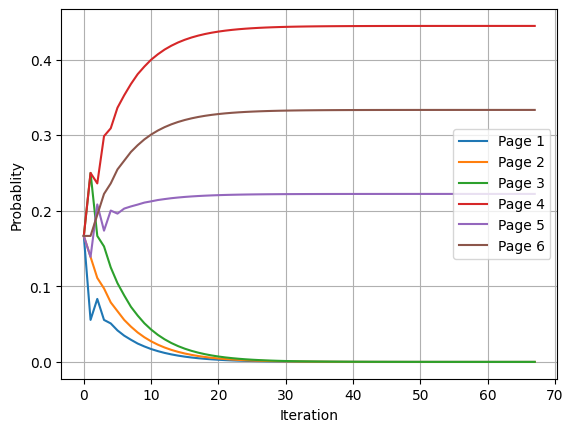

In [8]:
A = page_rank_history(H)

for i in range(A.shape[1]):
    plt.plot(A[:,i], label=f"Page {i+1}")
plt.legend()
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Probablity")
plt.savefig("ev2.png")
plt.show()

Each of the n-pages must have at least one out node, else the probablity vector is undefined.

If $A$ is a $n \times n$ stochastic matrix and $x_0$ is some initial vector for the difference equation $x_{n+1} = Ax_n$, then the steady state vector is
$$ x_{equilib} = \lim_{k\to\infty} A^kx_0 = c_1v_1 $$ where $v_1$ is the dominant eigenvector, and $c_1$ is the real value coefficient.  

Proof:

First note that $A$ is an $n × n$ stochastic matrix so from Theorem 4.8 we know that there are n linearly independent eigenvectors. We can then substitute the eigenvalues from Theorem 4.8 in Theorem 4.7. Noting that if $0 < λ_j < 1$ we have $\lim_{k → ∞} λ^k_j = 0$ the result follows immediately.

Then, the only thing we need to do is find the dominant eigenvector.

In [9]:
def page_rank_eig(H):
    l, e = np.linalg.eig(H)
    dom = e[:,0]
    return dom/np.sum(dom)

In [10]:
# Power method
def myPower(A, tol=1e-6):
    n = A[0].size
    x = np.full((n,), 1/n) # guess for the eigenvector
    maxiter = 10000 # iteration limit
    lambda_1 = None # dominant eignenvalue
    for i in range(maxiter):
        x = A @ x # iterate x
        x = x / np.linalg.norm(x) # normalize x
        lambda_1 = (x.T @ A @ x) / (x.T @ x) # Rayleigh Quotient to get new lambda

        # Convergence criterion: lambda * x = A * x
        if np.linalg.norm(A @ x - lambda_1 * x) < tol:
            break
        
    return x/np.sum(x)

### Comparison

In [11]:
%%timeit
r1 = page_rank_iter(H)

528 µs ± 8.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
%%timeit
r2 = page_rank_eig(H)

40 µs ± 325 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
%%timeit
r3 = myPower(H)

1.12 ms ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
r1 = page_rank_iter(H)
r2 = page_rank_eig(H)
r3 = myPower(H)

In [15]:
print(np.linalg.norm(r1 - r3))

2.0625876798509706e-06


In [16]:
print_ranks(r1)

Node 4
Node 6
Node 5
Node 3
Node 2
Node 1


In [17]:
print_ranks(r2)

Node 4
Node 6
Node 5
Node 3
Node 2
Node 1


## Figure 

In [18]:
H = np.array([
    [0, 0, 0, 0, 0, 0, 1/3, 0],
    [1/3, 0, 1/3, 0, 0, 0, 0, 0],
    [1/3, 1, 0, 0, 1/4, 0, 1/3, 0],
    [0, 0, 0, 0, 1/4, 1, 0, 1],
    [0, 0, 1/3, 1/3, 0, 0, 0, 0],
    [0, 0, 0, 1/3, 1/4, 0, 0, 0],
    [1/3, 0, 1/3, 0, 1/4, 0, 0, 0],
    [0, 0, 0, 1/3, 0, 0, 1/3, 0]
])

In [19]:
%%timeit
r1 = page_rank_iter(H)

486 µs ± 4.07 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
%%timeit
r2 = page_rank_eig(H)

48.9 µs ± 477 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [21]:
%%timeit
r3 = myPower(H)

1.08 ms ± 8.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
r1 = page_rank_iter(H)
r2 = page_rank_eig(H)
r3 = myPower(H)

In [23]:
print(np.linalg.norm(r1 - r3))

3.594859700574482e-07


In [24]:
print_ranks(r1)

Node 4
Node 5
Node 6
Node 8
Node 3
Node 7
Node 2
Node 1


In [25]:
print_ranks(r2)

Node 4
Node 5
Node 6
Node 8
Node 3
Node 7
Node 2
Node 1
